# Midterm Examination

Consider a thin square panel made of aluminum alloy that can be treated as a homogeneous isotropic material with Young's modulus $E$ and Poisson's ratio $𝜈$. It is subjected to uniform stress loading on its edges in the x-y coordinates, as shown in Fig.\ref{image:SquareEyyxy}. Because it is thin, and no force is applied in the $z$-direction. 

The data are given as $E=85 GPa$, $𝜈=1/3$, $L=80mm$, and stresses are: $𝜎_{xx}=0, 𝜎_{yy}=158 MPa, 𝜎_{xy}=68 MPa$. 

<img src="../images/SquareEyyxy.png" alt=" " width="300"/><br>
\begin{figure}
  \includegraphics[width=5cm]{}
  \caption{\label{image:SquareEyyxy} A thin square panel subjected to uniform stresses on its edges.}
\end{figure}

1) Find the principal stresses and its direction, maximum shear stress and its direction. (15 marks)

2) Rotate the coordinate by $30^\circ$ to form X-Y coordinates, and compute the stresses in the new coordinates. (10 marks)

3) Derive the formulas for computing the strain components. (15 marks)

4) Find the principal strains and its direction, maximum shear strain and its direction. (10 marks)

5) Draw the Mohr circle for the strains. (10 marks)

6) Using the coordinate transformation rule, determine the elongation of the diagonal DB. (15 marks)

7) Using the coordinate transformation rule, determine the angle change between AB and BC. (15 marks)

8) Determine the $𝜀_{zz}$ value in the panel. (10 marks)

In [3]:
# Place curse in this cell, and press Ctrl+Enter to import dependences. 
import sys                         # for accessing the computer system
sys.path.append('../grbin/')  # Change to the directory in your system 

from commonImports import *      # Import dependences from '../grbin/'
import grcodes as gr                 # Import the module of the author
#importlib.reload(gr)            # When grcodes is modified, reload it

from continuum_mechanics import vector 
init_printing(use_unicode=True)      # For latex-like quality printing 
np.set_printoptions(precision=4,suppress=True)  # Digits in print-outs

1. 

In [4]:
stressmatrix = np.array([[0,68,0],[68,158,0],[0,0,0]])

eigenvalues0, eigenvectors0 = lg.eig(stressmatrix)  

#Sort in order
idx = eigenvalues0.argsort()[::-1]   
eigenvalues0 = eigenvalues0[idx]
eigenvectors0 = eigenvectors0[:,idx]
print('Pricipal stress (Eigenvalues, MPa):\n',eigenvalues0,'\n')

print(f'Principal stress directions (Eigenvectors):\n{eigenvectors0}\n')

angle = np.arccos(eigenvectors0[0,0])*180/np.pi

print(f"Possible angles (n1,x): {angle}° or {180-angle}°")

Pricipal stress (Eigenvalues, MPa):
 [183.2353   0.     -25.2353] 

Principal stress directions (Eigenvectors):
[[-0.3479  0.     -0.9375]
 [-0.9375  0.      0.3479]
 [ 0.      1.      0.    ]]

Possible angles (n1,x): 110.3602682348774° or 69.6397317651226°


In [5]:
maxshear = (np.sqrt((4*(stressmatrix[0,1]**2))+((stressmatrix[0,0]-stressmatrix[1,1])**2)))/2

print("The maximum shear stress is %3.2f MPa\n" % (maxshear))

sr = np.sqrt((stressmatrix[0,0]**2)-(2*stressmatrix[0,0]*stressmatrix[1,1])+(4*(stressmatrix[0,1]**2))+(stressmatrix[1,1]**2))
maxsheardir = np.array([[np.degrees(np.arctan(((-1*sr)+(2*stressmatrix[0,1]))/(stressmatrix[0,0]-stressmatrix[1,1])))],[np.degrees(np.arctan((sr+(2*stressmatrix[0,1]))/(stressmatrix[0,0]-stressmatrix[1,1])))]])
print(f'Maximum shear stress directions:\n{maxsheardir}\n')

The maximum shear stress is 104.24 MPa

Maximum shear stress directions:
[[ 24.6397]
 [-65.3603]]



2. 

In [6]:
def Tensor2_transfer(T,S):
    '''Sybolic coordinate transformation for 2nd order tensors
    '''
    S = np.tensordot(T, S, axes=([1],[0]))
    S = np.tensordot(S, T, axes=([1],[1]))
    return S

In [7]:
def transferM(theta, about = 'z'):
    '''Create a transformation matrix for coordinate transformation (numpy)\
    Input theta: rotation angle in degree \
          about: the axis of the rotation is about \
    Return: numpy array of transformation matrix of shape (3,3)'''
    from scipy.stats import ortho_group
    
    n = 3        # 3-dimensonal problem
    c, s = np.cos(np.deg2rad(theta)), np.sin(np.deg2rad(theta))
    #T = np.zeros((n,n))
    
    if about == 'z':
        # rotates about z by theta 
        T = np.array([[ c, s, 0.],
                      [-s, c, 0.],
                      [0.,0., 1.]]) 
    elif about == 'y':
        # rotates about y by theta 
        T = np.array([[ c, 0.,-s],
                      [0., 1.,0.],
                      [s, 0., c]])  
    elif about == 'x':
        # rotates about x by theta 
        T = np.array([[ 1.,0., 0.],
                      [ 0., c, s],
                      [ 0.,-s, c]])
    else: # randomly generated unitary matrix->transformation matrix, no theta
        T = ortho_group.rvs(dim=n)          # Generate a random matrix
        T[2,:] = np.cross(T[0,:], T[1,:])   # Enforce the righ-hand rule
        
    return T, about

In [8]:
theta = 30

T , about = transferM(theta)

stresses_30 = T@stressmatrix@T.T

print("The new stress components are (MPa)")
print(stresses_30)

The new stress components are (MPa)
[[ 98.3897 102.416    0.    ]
 [102.416   59.6103   0.    ]
 [  0.       0.       0.    ]]


3. 

No force in $z$ means this can be treated as a plane-stress problem

$
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy} 
\end{bmatrix} = \begin{bmatrix}
c_{xx} & c_{xy} & 0 \\
c_{xy} & c_{yy} & 0 \\
0 & 0 & c_{zz}
\end{bmatrix} \begin{bmatrix}
\epsilon_{xx} \\
\epsilon_{yy} \\
2 \epsilon_{xy}
\end{bmatrix} \\
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy} 
\end{bmatrix} = \frac{E}{(1-v^2)} \begin{bmatrix}
1 & v & 0 \\
v & 1 & 0 \\
0 & 0 & \frac{(1-v)}{2}
\end{bmatrix} \begin{bmatrix}
\epsilon_{xx} \\
\epsilon_{yy} \\
2 \epsilon_{xy}
\end{bmatrix} \\
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy} 
\end{bmatrix} = \begin{bmatrix}
\frac{E}{(1-v^2)} & \frac{E v}{(1-v^2)} & 0 \\
\frac{E v}{(1-v^2)} & \frac{E}{(1-v^2)} & 0 \\
0 & 0 & \frac{E(\frac{1}{2}-\frac{v}{2})}{1-v^2}
\end{bmatrix} \begin{bmatrix}
\epsilon_{xx} \\
\epsilon_{yy} \\
2 \epsilon_{xy}
\end{bmatrix}
$

$
\sigma_{xx} = \epsilon_{xx} \frac{E}{(1-v^2)} + \epsilon_{yy} \frac{E v}{1-v^2} \\
\sigma_{yy} = \epsilon_{xx} \frac{E v}{(1-v^2)} + \epsilon_{yy} \frac{E}{1-v^2} \\
\sigma_{xy} = 2 \epsilon_{xy} \frac{E (\frac{1}{2} - \frac{v}{2})}{1-v^2}
$

Rearrainging and solving:

$
\epsilon_{xx} = \frac{1}{E} (\sigma_{xx} - v \sigma_{yy}) \\
\epsilon_{yy} = \frac{1}{E} (\sigma_{yy} - v \sigma_{xx}) \\
\epsilon_{xy} = \frac{\sigma_{xy} (1+v)}{E} \\
$

Additionally, strain in $z$ is non-zero:

$
\epsilon_{zz} = -\frac{v}{E} (\sigma_{xx} + \sigma_{yy})
$

In [9]:
sxx, syy, sxy, exx, eyy, exy, ezz = sp.symbols("sxx, syy, sxy, exx, eyy, exy, ezz")
E, v = sp.symbols("E, v")

C = (E/(1-(v**2)))*np.array([[1,v,0],[v,1,0],[0,0,((1-v)/2)]])

stress = C*np.array([[exx],[eyy],[2*exy]])

exx = (1/E)*(sxx-(v*syy))
eyy = (1/E)*(syy-(v*sxx))
exy = ((sxy*(1+v))/E)
ezz = -1*(v/E)*(sxx+syy)

In [10]:
Enum = 85*(10**3)
vnum = 1/3

strainmatrix = np.array([[float(exx.subs({E:Enum,v:vnum,sxx:stressmatrix[0,0],syy:stressmatrix[1,1]})),float(exy.subs({E:Enum,v:vnum,sxy:stressmatrix[0,1]})),0],[float(exy.subs({E:Enum,v:vnum,sxy:stressmatrix[0,1]})),float(eyy.subs({E:Enum,v:vnum,sxx:stressmatrix[0,0],syy:stressmatrix[1,1]})),0],[0,0,float(ezz.subs({E:Enum,v:vnum,sxx:stressmatrix[0,0],syy:stressmatrix[1,1]}))]])

strainmatrix

array([[-0.0006,  0.0011,  0.    ],
       [ 0.0011,  0.0019,  0.    ],
       [ 0.    ,  0.    , -0.0006]])

4. 

In [11]:
eigenvalues4, eigenvectors4 = lg.eig(strainmatrix)  

#Sort in order
idx = eigenvalues4.argsort()[::-1]   
eigenvalues4 = eigenvalues4[idx]
eigenvectors4 = eigenvectors4[:,idx]
print('Pricipal strains (Eigenvalues):\n',eigenvalues4,'\n')

print(f'Principal strain directions (Eigenvectors):\n{eigenvectors4}\n')

Pricipal strains (Eigenvalues):
 [ 0.0023 -0.0006 -0.001 ] 

Principal strain directions (Eigenvectors):
[[-0.3479  0.     -0.9375]
 [-0.9375  0.      0.3479]
 [ 0.      1.      0.    ]]



In [12]:
maxstrain = (np.sqrt((4*(strainmatrix[0,1]**2))+((strainmatrix[0,0]-strainmatrix[1,1])**2)))/2

print("The maximum shear strain is %3.6f \n" % (maxstrain))

sr = np.sqrt((strainmatrix[0,0]**2)-(2*strainmatrix[0,0]*strainmatrix[1,1])+(4*(strainmatrix[0,1]**2))+(strainmatrix[1,1]**2))
maxstraindir = np.array([[np.degrees(np.arctan(((-1*sr)+(2*strainmatrix[0,1]))/(strainmatrix[0,0]-strainmatrix[1,1])))],[np.degrees(np.arctan((sr+(2*strainmatrix[0,1]))/(strainmatrix[0,0]-strainmatrix[1,1])))]])
print(f'Maximum shear strain directions:\n{maxstraindir}\n')

The maximum shear strain is 0.001635 

Maximum shear strain directions:
[[ 24.6397]
 [-65.3603]]



5. 

In [13]:
from continuum_mechanics.visualization import mohr3d

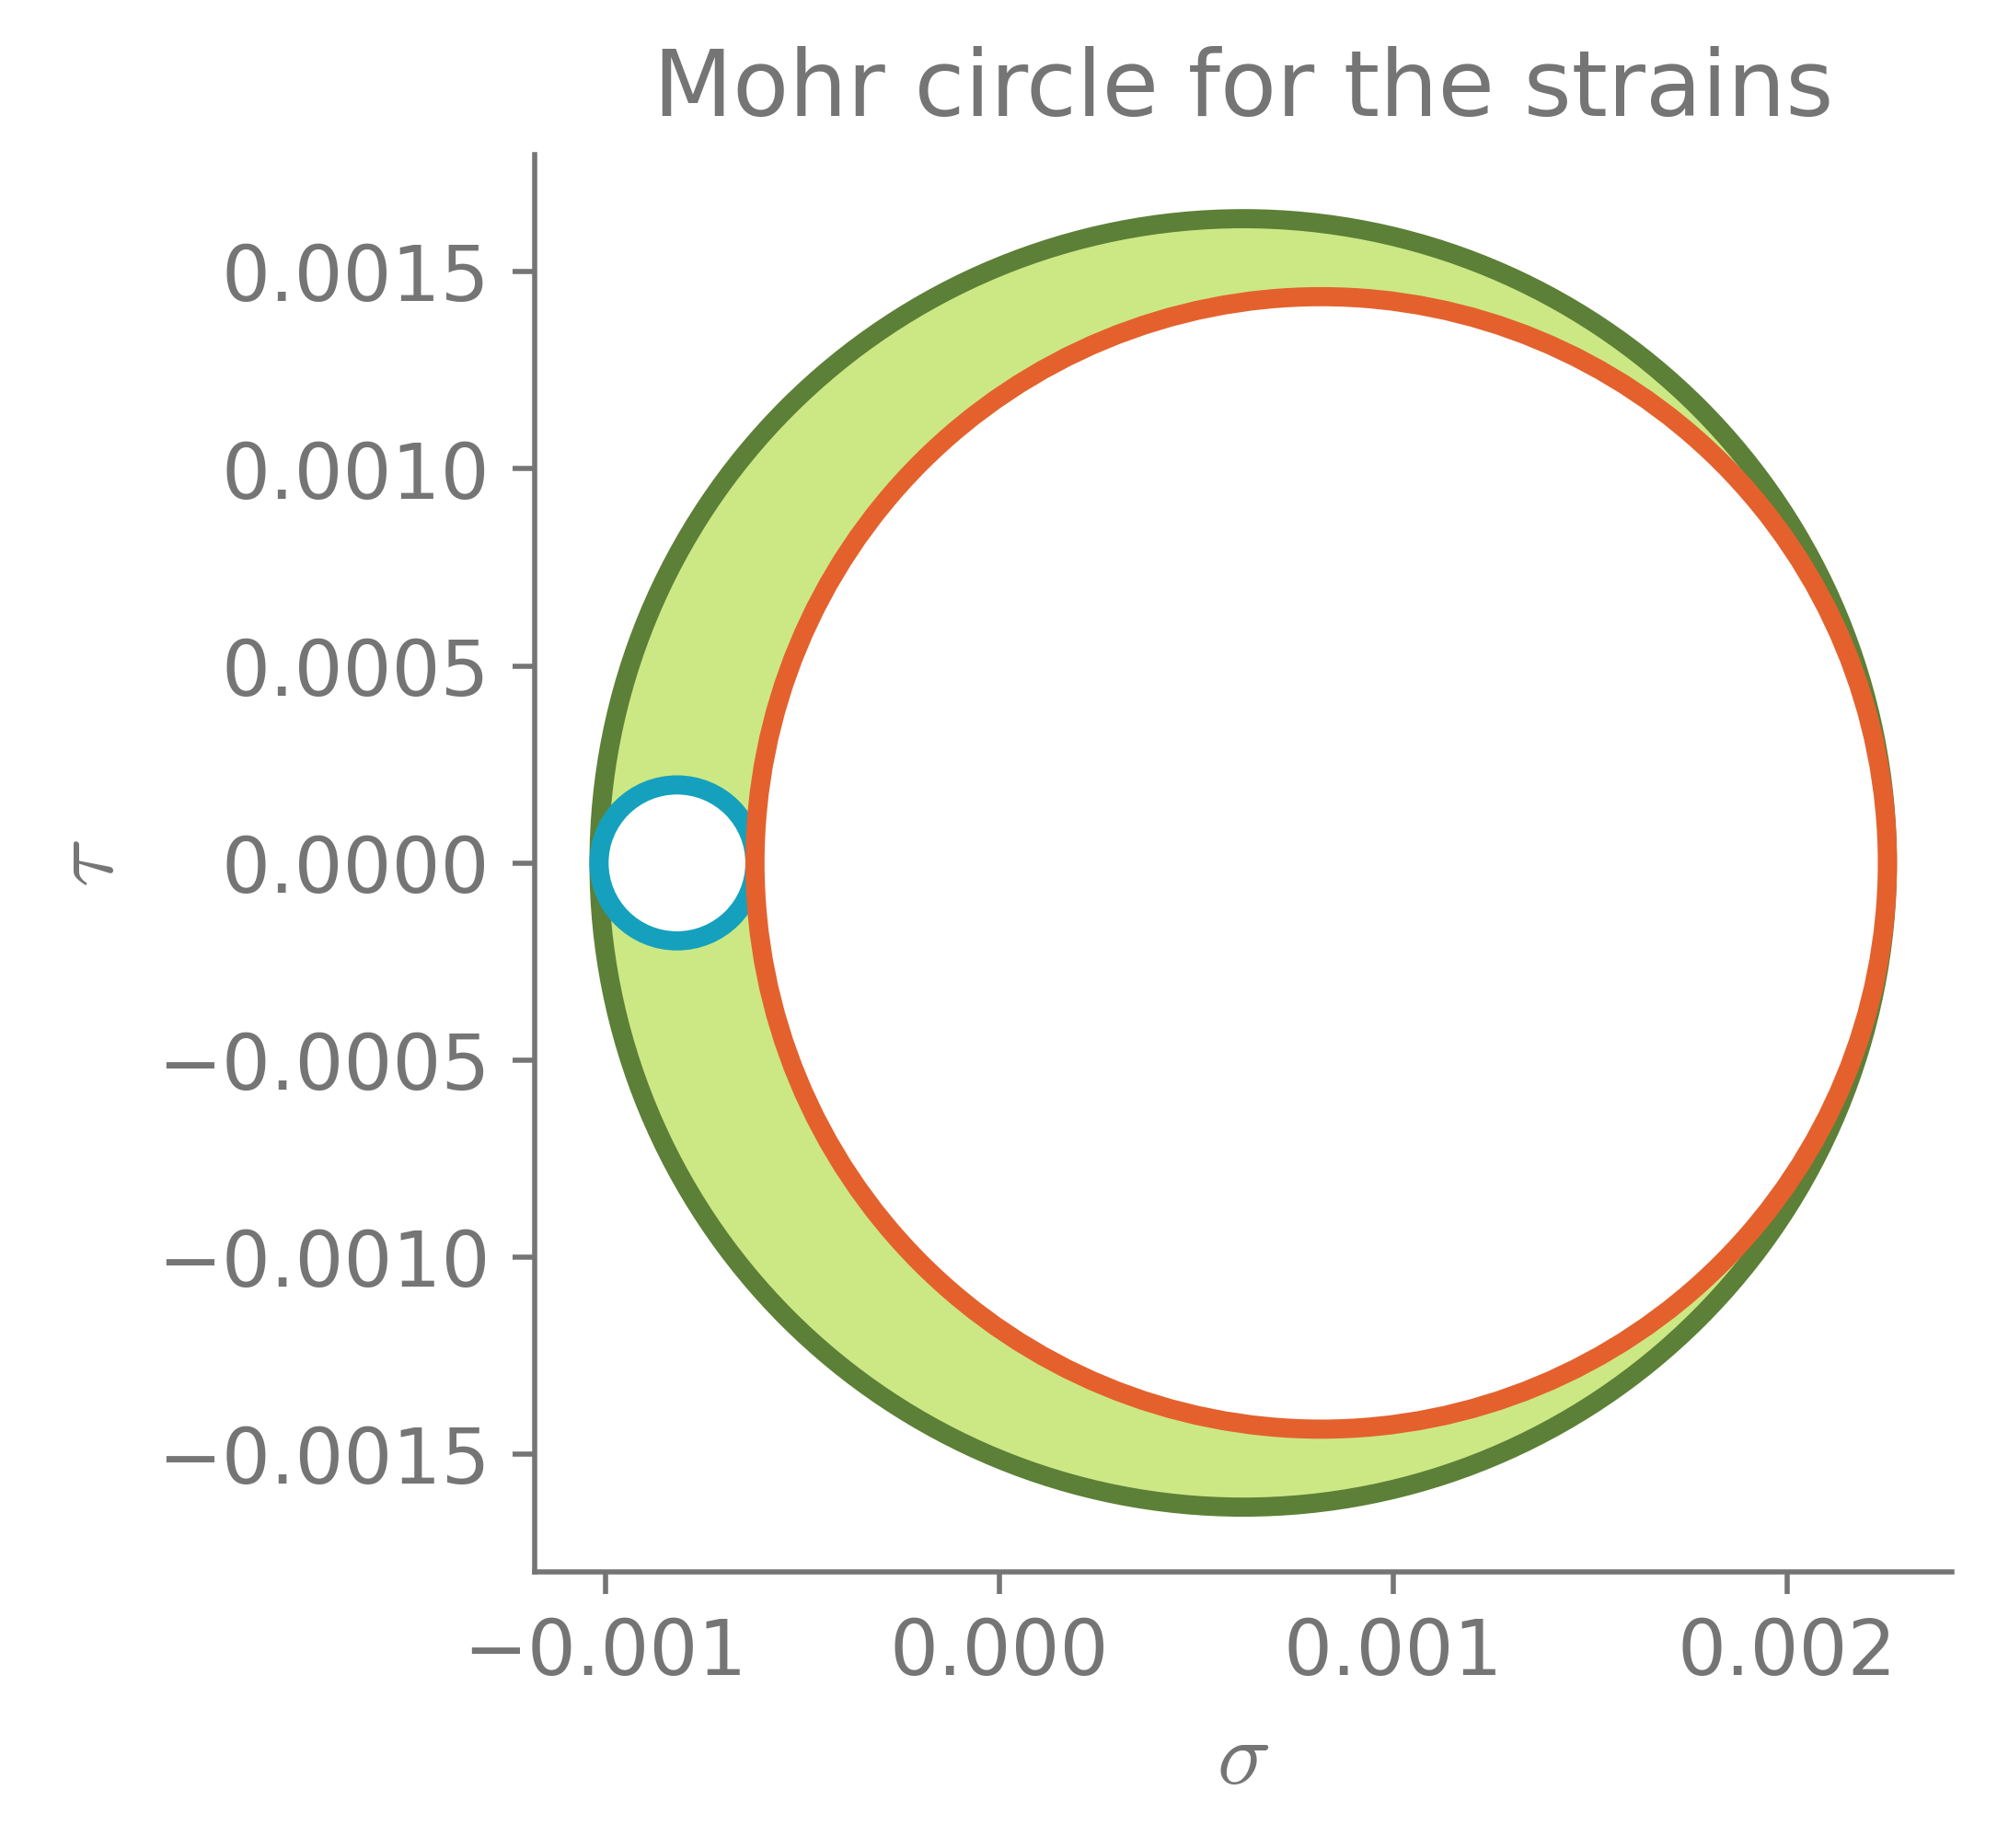

In [14]:
mohr3d(strainmatrix)
plt.title("Mohr circle for the strains")
plt.show()

6. 

In [15]:
L = 80*(10**-3)

theta6 = 135 

T6, about = transferM(theta6)

strain6 = T6@strainmatrix@T6.T

print("Strain: %3.6f" % (strain6[0,0]))
print("Elongation: %3.8f m" % (np.sqrt(2)*L*strain6[0,0]))

Strain: -0.000447
Elongation: -0.00005058 m


7. 

In [16]:
N_AB = np.array([L,0,0])/L
N_BC = np.array([0,L,0])/L

eABAC = N_AB@strainmatrix@N_BC

print("Strain: %3.6f" % (eABAC))
print("Angle Change: %3.6f°" % (2*eABAC))

Strain: 0.001067
Angle Change: 0.002133°


8. 

In [17]:
# Derived in part 3

ezznum = strainmatrix[2,2]

print("ezz = %3.8f" % (ezznum))

ezz = -0.00061961
